In [1]:
# from support.df_init import init

# df = init()

In [2]:
# df['awful_rating'] = ((df['averageRating'] >= 0) & (df['averageRating'] <= 4)).astype(int)
# # df['low_rating'] = ((df['averageRating'] > 4) & (df['averageRating'] <= 5)).astype(int)
# df['medium_rating'] = ((df['averageRating'] > 4) & (df['averageRating'] <= 7)).astype(int)
# df['high_rating'] = ((df['averageRating'] > 7) & (df['averageRating'] <= 10)).astype(int)

# df[['awful_rating', 'medium_rating', 'high_rating']]

In [3]:
# rating_features = ['awful_rating', 'medium_rating', 'high_rating', ]
# percentages = (df[rating_features].sum() / len(df)) * 100
# print(percentages)

In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedShuffleSplit

# # Splitting the dataset into training and testing sets while maintaining the same ratio of rating features

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df, df[rating_features]):
#     train_set = df.loc[train_index]
#     test_set = df.loc[test_index]
# train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
# # train_set.to_csv("dm2_dataset_2425_imdb/imbalanced_train_70.csv", index=False)
# # test_set.to_csv("dm2_dataset_2425_imdb/imbalanced_test_30.csv", index=False)

In [5]:
from support.df_init import init

train_set = init('dm2_dataset_2425_imdb/imbalanced_train_70.csv')
test_set = init('dm2_dataset_2425_imdb/imbalanced_test_30.csv')

In [6]:
# TODO: add outlier detection+handling

from support.imputation import impute_data

train_set, test_set = impute_data(train=train_set, test=test_set)

In [7]:
from support.embedding import embedding

train_set, test_set = embedding(train=train_set, test=test_set)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from support.transformations import apply_transformations

train_set, test_set = apply_transformations(train=train_set, test=test_set)

In [9]:
from support.scaling import scale_data

train_set, test_set = scale_data(train=train_set, test=test_set)

In [10]:
import numpy as np

conditions = [
    train_set['averageRating'] <= 4,
    train_set['averageRating'] <= 7
]
choices = ['awful', 'medium']

train_set['ratingQuality'] = np.select(conditions, choices, default='high')

conditions = [
    test_set['averageRating'] <= 4,
    test_set['averageRating'] <= 7
]
test_set['ratingQuality'] = np.select(conditions, choices, default='high')

In [11]:
feats = [
    'startYear', 'runtimeMinutes',
    'totalCredits', 'numRegions', 'ratingCount',
    'castNumber', 'companiesNumber', 'writerCredits',
    'directorsCredits', 'quotesTotal', 'totalMedia',
    'totalNominations',
    'regions_freq_enc', 'regions_EU',
    'regions_NA', 'regions_AS', 'regions_AF', 'regions_OC', 'regions_SA',
    'regions_UNK', 'countryOfOrigin_freq_enc', 'countryOfOrigin_NA',
    'countryOfOrigin_AF', 'countryOfOrigin_AS', 'countryOfOrigin_EU',
    'countryOfOrigin_OC', 'countryOfOrigin_SA', 'countryOfOrigin_UNK',
    'reviewsTotal',
    # 'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation',
    # 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary',
    # 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Film-Noir',
    # 'genre_Game-Show', 'genre_History', 'genre_Horror', 'genre_Music',
    # 'genre_Musical', 'genre_Mystery', 'genre_News', 'genre_Reality-TV',
    # 'genre_Romance', 'genre_Sci-Fi', 'genre_Short', 'genre_Sport',
    # 'genre_Talk-Show', 'genre_Thriller', 'genre_War', 'genre_Western',
    # 'titleType_movie', 'titleType_short', 'titleType_tvEpisode',
    # 'titleType_tvMiniSeries', 'titleType_tvMovie', 'titleType_tvSeries',
    # 'titleType_tvShort', 'titleType_tvSpecial', 'titleType_video',
    # 'titleType_videoGame'
]

Accuracy: 0.6252117699509585
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17      1585
           1       0.61      0.62      0.62     20663
           2       0.67      0.66      0.67     22612

    accuracy                           0.63     44860
   macro avg       0.48      0.48      0.48     44860
weighted avg       0.63      0.63      0.63     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.6252117699509585,
 '              precision    recall  f1-score   support\n\n           0       0.17      0.17      0.17      1585\n           1       0.61      0.62      0.62     20663\n           2       0.67      0.66      0.67     22612\n\n    accuracy                           0.63     44860\n   macro avg       0.48      0.48      0.48     44860\nweighted avg       0.63      0.63      0.63     44860\n')

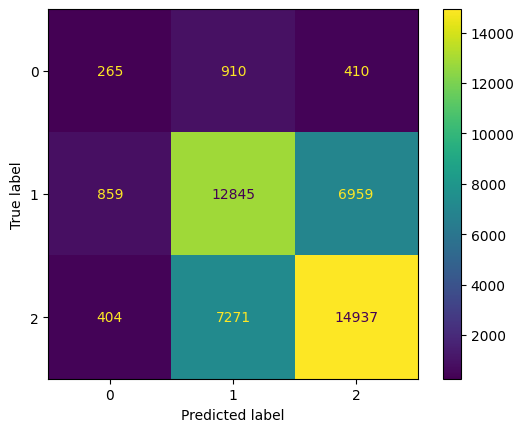

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

def train_decision_tree(X_train, y_train, X_test, y_test, class_weight=None, display_labels=None):
    """
    Train a Decision Tree Classifier and evaluate its performance.

    Parameters:
    - X_train: Training features (DataFrame or array-like)
    - y_train: Training target (DataFrame or array-like)
    - X_test: Testing features (DataFrame or array-like)
    - y_test: Testing target (DataFrame or array-like)
    - class_weight: Weights associated with classes in the form {class_label: weight} or "balanced" (default: None)
    - display_labels: Labels for the confusion matrix display (default: None)

    Returns:
    - clf: Trained Decision Tree Classifier
    - accuracy: Accuracy of the model on the test set
    - report: Classification report as a string
    """
    # Initialize and train the Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42, class_weight=class_weight)
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Plot the confusion matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=display_labels,
        cmap='viridis'
    )

    return clf, accuracy, report


rating_quality_mapping = {'awful': 0, 'medium': 1, 'high': 2}
train_set['ratingQualityNumeric'] = train_set['ratingQuality'].map(rating_quality_mapping)

test_set['ratingQualityNumeric'] = test_set['ratingQuality'].map(rating_quality_mapping)
# Example usage:
train_decision_tree(train_set[feats],
                    train_set['ratingQualityNumeric'],
                    test_set[feats],
                    test_set['ratingQualityNumeric'],
                    class_weight='balanced',)

Accuracy: 0.48499777084262147
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.55      0.14      1585
           1       0.56      0.43      0.49     20663
           2       0.66      0.53      0.59     22612

    accuracy                           0.48     44860
   macro avg       0.43      0.50      0.41     44860
weighted avg       0.59      0.48      0.53     44860



(DecisionTreeClassifier(random_state=42),
 0.48499777084262147,
 '              precision    recall  f1-score   support\n\n           0       0.08      0.55      0.14      1585\n           1       0.56      0.43      0.49     20663\n           2       0.66      0.53      0.59     22612\n\n    accuracy                           0.48     44860\n   macro avg       0.43      0.50      0.41     44860\nweighted avg       0.59      0.48      0.53     44860\n')

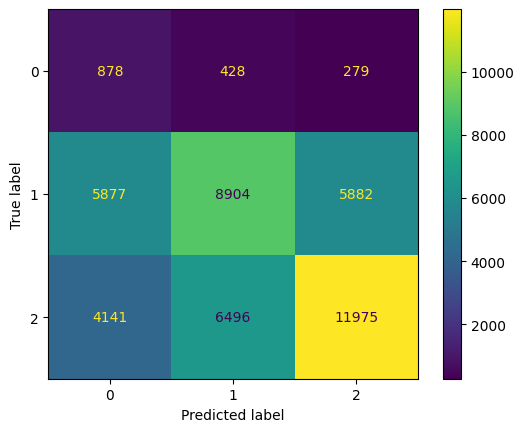

In [13]:
from sklearn.utils import resample
import pandas as pd

# Separate the classes
awful_rating_1 = train_set[train_set['awful_rating'] == 1]

# Determine the size of the least present class
min_class_size = len(awful_rating_1)

# Downsample the other classes to match the size of the least present class
medium_rating = train_set[train_set['medium_rating'] == 1]
high_rating = train_set[train_set['high_rating'] == 1]

medium_rating_downsampled = resample(medium_rating,
                                     replace=False,
                                     n_samples=min_class_size,
                                     random_state=42)

high_rating_downsampled = resample(high_rating,
                                   replace=False,
                                   n_samples=min_class_size,
                                   random_state=42)

# Combine all classes into a balanced dataset
balanced_train_set = pd.concat([awful_rating_1, medium_rating_downsampled, high_rating_downsampled])

# Define features and target
X_balanced = balanced_train_set[feats]
y_balanced = balanced_train_set['ratingQualityNumeric']

train_decision_tree(X_balanced, y_balanced, test_set[feats], test_set['ratingQualityNumeric'])

Accuracy: 0.48499777084262147
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.55      0.14      1585
           1       0.56      0.43      0.49     20663
           2       0.66      0.53      0.59     22612

    accuracy                           0.48     44860
   macro avg       0.43      0.50      0.41     44860
weighted avg       0.59      0.48      0.53     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.48499777084262147,
 '              precision    recall  f1-score   support\n\n           0       0.08      0.55      0.14      1585\n           1       0.56      0.43      0.49     20663\n           2       0.66      0.53      0.59     22612\n\n    accuracy                           0.48     44860\n   macro avg       0.43      0.50      0.41     44860\nweighted avg       0.59      0.48      0.53     44860\n')

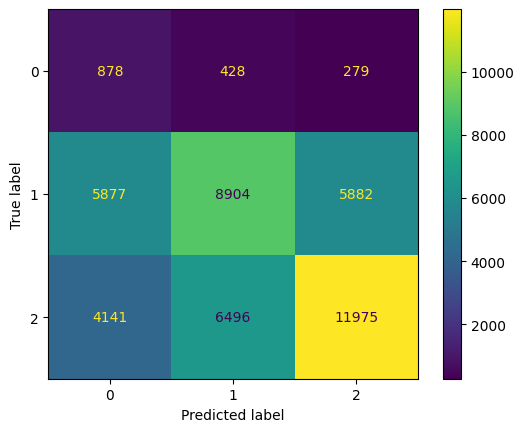

In [14]:
train_decision_tree(X_balanced, y_balanced, test_set[feats], test_set['ratingQualityNumeric'], class_weight='balanced',)

# ENN

In [15]:
from imblearn.under_sampling import EditedNearestNeighbours

# Define the ENN undersampler
enn = EditedNearestNeighbours(n_neighbors=4, kind_sel='mode')

# Convert the target column 'ratingQuality' to numeric values
rating_quality_mapping = {'awful': 0, 'medium': 1, 'high': 2}
train_set['ratingQualityNumeric'] = train_set['ratingQuality'].map(rating_quality_mapping)

# Apply EditedNearestNeighbours with the numeric target column
X_resampled, y_resampled = enn.fit_resample(
    X=train_set[feats],
    y=train_set['ratingQualityNumeric'])

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)
# check the distribution of the classes
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Resampled X shape: (71603, 29)
Resampled y shape: (71603,)
Class distribution after resampling:
ratingQualityNumeric
1    36609
2    31392
0     3602
Name: count, dtype: int64


Accuracy: 0.637962550156041
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.24      0.17      1585
           1       0.63      0.68      0.65     20663
           2       0.72      0.63      0.67     22612

    accuracy                           0.64     44860
   macro avg       0.49      0.52      0.50     44860
weighted avg       0.66      0.64      0.65     44860



(DecisionTreeClassifier(random_state=42),
 0.637962550156041,
 '              precision    recall  f1-score   support\n\n           0       0.13      0.24      0.17      1585\n           1       0.63      0.68      0.65     20663\n           2       0.72      0.63      0.67     22612\n\n    accuracy                           0.64     44860\n   macro avg       0.49      0.52      0.50     44860\nweighted avg       0.66      0.64      0.65     44860\n')

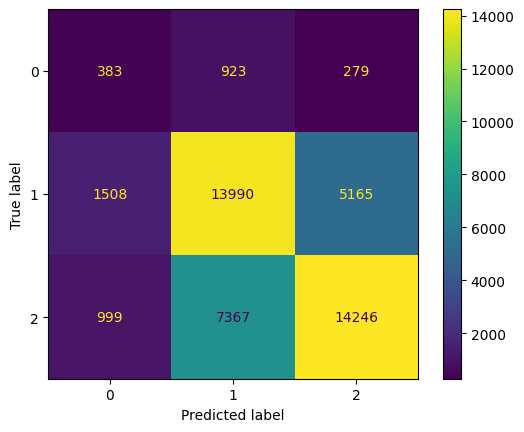

In [16]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric']
)

Accuracy: 0.6364244315648685
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.22      0.17      1585
           1       0.62      0.68      0.65     20663
           2       0.72      0.62      0.67     22612

    accuracy                           0.64     44860
   macro avg       0.49      0.51      0.50     44860
weighted avg       0.65      0.64      0.64     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.6364244315648685,
 '              precision    recall  f1-score   support\n\n           0       0.14      0.22      0.17      1585\n           1       0.62      0.68      0.65     20663\n           2       0.72      0.62      0.67     22612\n\n    accuracy                           0.64     44860\n   macro avg       0.49      0.51      0.50     44860\nweighted avg       0.65      0.64      0.64     44860\n')

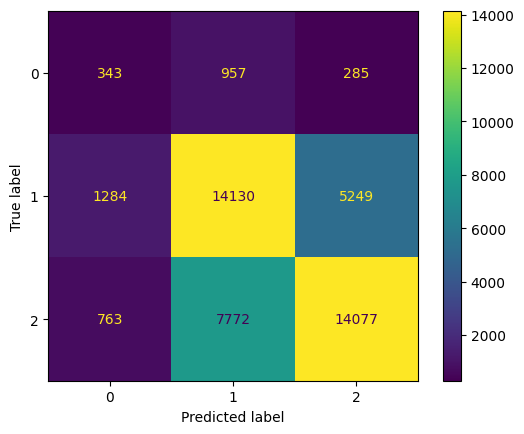

In [17]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric'],
    class_weight='balanced',
)

In [18]:
from imblearn.under_sampling import EditedNearestNeighbours

# Define the ENN undersampler
enn = EditedNearestNeighbours(n_neighbors=1, kind_sel='all')


# Apply EditedNearestNeighbours with the numeric target column
X_resampled, y_resampled = enn.fit_resample(
    X=train_set[feats], y=train_set['ratingQualityNumeric'])

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)
# check the distribution of the classes
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Resampled X shape: (70142, 29)
Resampled y shape: (70142,)
Resampled X shape: (70142, 29)
Resampled y shape: (70142,)
Class distribution after resampling:
ratingQualityNumeric
2    35263
1    31277
0     3602
Name: count, dtype: int64


Accuracy: 0.6366473473027195
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.24      0.17      1585
           1       0.64      0.61      0.63     20663
           2       0.69      0.68      0.69     22612

    accuracy                           0.64     44860
   macro avg       0.49      0.51      0.50     44860
weighted avg       0.65      0.64      0.64     44860



(DecisionTreeClassifier(random_state=42),
 0.6366473473027195,
 '              precision    recall  f1-score   support\n\n           0       0.13      0.24      0.17      1585\n           1       0.64      0.61      0.63     20663\n           2       0.69      0.68      0.69     22612\n\n    accuracy                           0.64     44860\n   macro avg       0.49      0.51      0.50     44860\nweighted avg       0.65      0.64      0.64     44860\n')

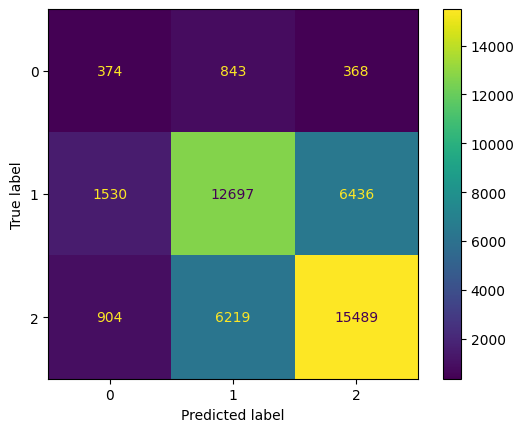

In [19]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric']
)

Accuracy: 0.6336379848417298
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.23      0.18      1585
           1       0.63      0.62      0.62     20663
           2       0.69      0.68      0.68     22612

    accuracy                           0.63     44860
   macro avg       0.49      0.51      0.49     44860
weighted avg       0.64      0.63      0.64     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.6336379848417298,
 '              precision    recall  f1-score   support\n\n           0       0.14      0.23      0.18      1585\n           1       0.63      0.62      0.62     20663\n           2       0.69      0.68      0.68     22612\n\n    accuracy                           0.63     44860\n   macro avg       0.49      0.51      0.49     44860\nweighted avg       0.64      0.63      0.64     44860\n')

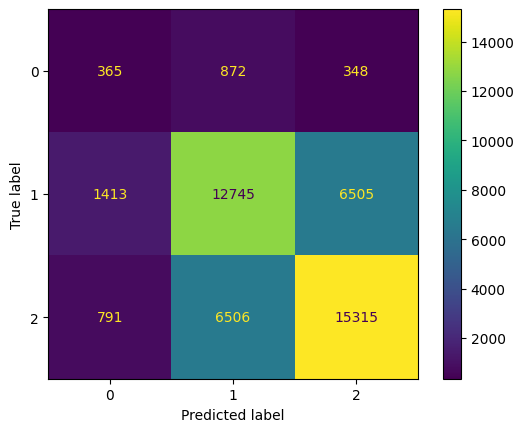

In [20]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric'],
    class_weight='balanced',
)

# AllKNN

In [21]:
from imblearn.under_sampling import AllKNN

allknn = AllKNN(n_neighbors=3, kind_sel='mode')

X_resampled, y_resampled = allknn.fit_resample(
    X=train_set[feats],
    y=train_set['ratingQualityNumeric']
)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)
# check the distribution of the classes
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Resampled X shape: (56507, 29)
Resampled y shape: (56507,)
Resampled X shape: (56507, 29)
Resampled y shape: (56507,)
Class distribution after resampling:
ratingQualityNumeric
2    27382
1    25523
0     3602
Name: count, dtype: int64


Accuracy: 0.6312527864467231
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.32      0.18      1585
           1       0.64      0.63      0.64     20663
           2       0.72      0.66      0.69     22612

    accuracy                           0.63     44860
   macro avg       0.50      0.53      0.50     44860
weighted avg       0.66      0.63      0.64     44860



(DecisionTreeClassifier(random_state=42),
 0.6312527864467231,
 '              precision    recall  f1-score   support\n\n           0       0.13      0.32      0.18      1585\n           1       0.64      0.63      0.64     20663\n           2       0.72      0.66      0.69     22612\n\n    accuracy                           0.63     44860\n   macro avg       0.50      0.53      0.50     44860\nweighted avg       0.66      0.63      0.64     44860\n')

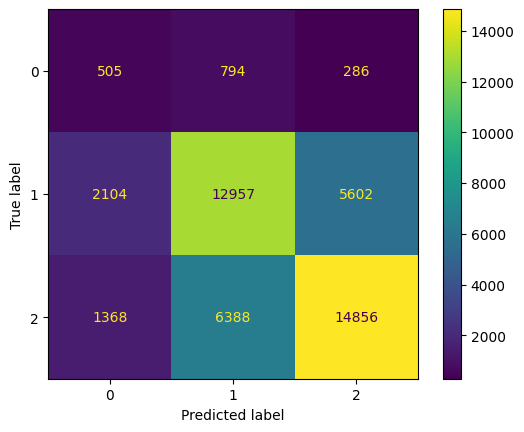

In [22]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric']
)

Accuracy: 0.6323227819884084
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.31      0.19      1585
           1       0.64      0.63      0.63     20663
           2       0.71      0.66      0.68     22612

    accuracy                           0.63     44860
   macro avg       0.50      0.53      0.50     44860
weighted avg       0.66      0.63      0.64     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.6323227819884084,
 '              precision    recall  f1-score   support\n\n           0       0.14      0.31      0.19      1585\n           1       0.64      0.63      0.63     20663\n           2       0.71      0.66      0.68     22612\n\n    accuracy                           0.63     44860\n   macro avg       0.50      0.53      0.50     44860\nweighted avg       0.66      0.63      0.64     44860\n')

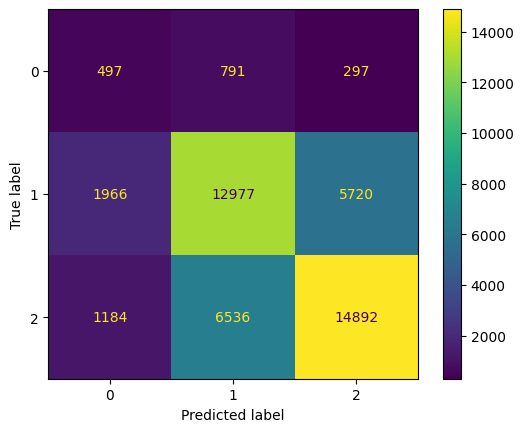

In [23]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric'],
    class_weight='balanced',
)

In [24]:
from imblearn.under_sampling import AllKNN

allknn = AllKNN(n_neighbors=2, kind_sel='all')

X_resampled, y_resampled = allknn.fit_resample(
    X=train_set[feats],
    y=train_set['ratingQualityNumeric']
)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)
# check the distribution of the classes
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Resampled X shape: (55341, 29)
Resampled y shape: (55341,)
Resampled X shape: (55341, 29)
Resampled y shape: (55341,)
Class distribution after resampling:
ratingQualityNumeric
2    28411
1    23328
0     3602
Name: count, dtype: int64


Accuracy: 0.6302496656263932
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.30      0.17      1585
           1       0.66      0.59      0.62     20663
           2       0.70      0.69      0.70     22612

    accuracy                           0.63     44860
   macro avg       0.49      0.53      0.49     44860
weighted avg       0.66      0.63      0.64     44860



(DecisionTreeClassifier(random_state=42),
 0.6302496656263932,
 '              precision    recall  f1-score   support\n\n           0       0.12      0.30      0.17      1585\n           1       0.66      0.59      0.62     20663\n           2       0.70      0.69      0.70     22612\n\n    accuracy                           0.63     44860\n   macro avg       0.49      0.53      0.49     44860\nweighted avg       0.66      0.63      0.64     44860\n')

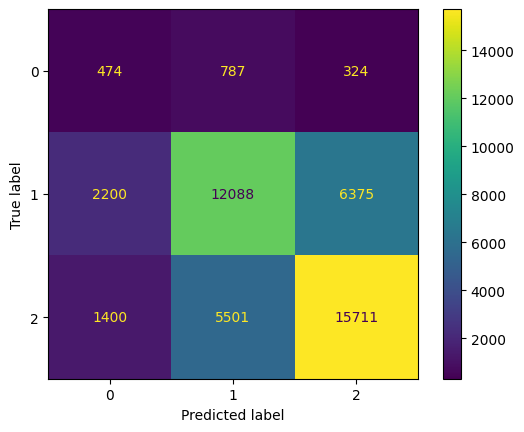

In [25]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric']
)

Accuracy: 0.6355996433348194
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.30      0.18      1585
           1       0.66      0.60      0.62     20663
           2       0.70      0.70      0.70     22612

    accuracy                           0.64     44860
   macro avg       0.50      0.53      0.50     44860
weighted avg       0.66      0.64      0.65     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.6355996433348194,
 '              precision    recall  f1-score   support\n\n           0       0.13      0.30      0.18      1585\n           1       0.66      0.60      0.62     20663\n           2       0.70      0.70      0.70     22612\n\n    accuracy                           0.64     44860\n   macro avg       0.50      0.53      0.50     44860\nweighted avg       0.66      0.64      0.65     44860\n')

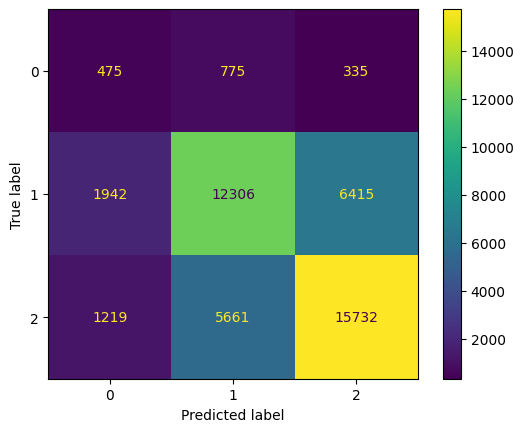

In [26]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric'],
    class_weight='balanced',
)

# Balance+ENN

In [27]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.pipeline import Pipeline

# Step 1: Balance the classes with RandomUnderSampler
min_class_size = train_set['ratingQuality'].value_counts().min()
sampling_strategy = {
    label: min_class_size for label in train_set['ratingQualityNumeric'].unique()
}

# Step 2: Create pipeline: balance first, then ENN
pipeline = Pipeline([
    ('undersample', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)),
    ('enn', EditedNearestNeighbours(n_neighbors=3, kind_sel='mode'))
])

# Step 3: Apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(
    X=train_set[feats],
    y=train_set['ratingQualityNumeric']
)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)
# check the distribution of the classes
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Resampled X shape: (6819, 29)
Resampled y shape: (6819,)
Resampled X shape: (6819, 29)
Resampled y shape: (6819,)
Class distribution after resampling:
ratingQualityNumeric
0    3602
2    1865
1    1352
Name: count, dtype: int64


Accuracy: 0.42523406152474363
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.77      0.12      1585
           1       0.63      0.32      0.42     20663
           2       0.71      0.50      0.59     22612

    accuracy                           0.43     44860
   macro avg       0.47      0.53      0.38     44860
weighted avg       0.65      0.43      0.49     44860



(DecisionTreeClassifier(random_state=42),
 0.42523406152474363,
 '              precision    recall  f1-score   support\n\n           0       0.07      0.77      0.12      1585\n           1       0.63      0.32      0.42     20663\n           2       0.71      0.50      0.59     22612\n\n    accuracy                           0.43     44860\n   macro avg       0.47      0.53      0.38     44860\nweighted avg       0.65      0.43      0.49     44860\n')

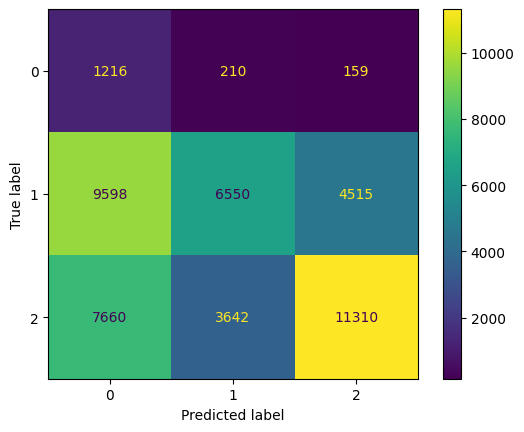

In [28]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric']
)

Accuracy: 0.4183236736513598
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.77      0.12      1585
           1       0.62      0.31      0.41     20663
           2       0.70      0.49      0.58     22612

    accuracy                           0.42     44860
   macro avg       0.46      0.52      0.37     44860
weighted avg       0.64      0.42      0.49     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.4183236736513598,
 '              precision    recall  f1-score   support\n\n           0       0.07      0.77      0.12      1585\n           1       0.62      0.31      0.41     20663\n           2       0.70      0.49      0.58     22612\n\n    accuracy                           0.42     44860\n   macro avg       0.46      0.52      0.37     44860\nweighted avg       0.64      0.42      0.49     44860\n')

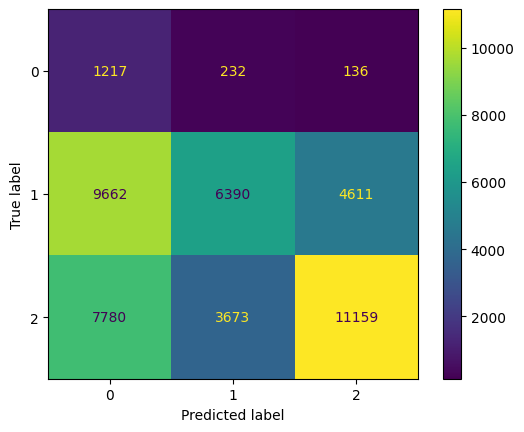

In [29]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric'],
    class_weight='balanced',
)

In [30]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.pipeline import Pipeline

# Step 1: Balance the classes with RandomUnderSampler
min_class_size = train_set['ratingQuality'].value_counts().min()
sampling_strategy = {
    label: min_class_size for label in train_set['ratingQualityNumeric'].unique()
}

# Step 2: Create pipeline: balance first, then ENN
pipeline = Pipeline([
    ('enn', EditedNearestNeighbours(n_neighbors=1, kind_sel='all')),
    ('undersample', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)),
])

# Step 3: Apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(
    X=train_set[feats],
    y=train_set['ratingQualityNumeric']
)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

# Display the resampled data
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)
# check the distribution of the classes
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Resampled X shape: (10806, 29)
Resampled y shape: (10806,)
Resampled X shape: (10806, 29)
Resampled y shape: (10806,)
Class distribution after resampling:
ratingQualityNumeric
0    3602
1    3602
2    3602
Name: count, dtype: int64


Accuracy: 0.5095407935800268
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.55      0.14      1585
           1       0.60      0.45      0.52     20663
           2       0.69      0.56      0.61     22612

    accuracy                           0.51     44860
   macro avg       0.46      0.52      0.42     44860
weighted avg       0.63      0.51      0.55     44860



(DecisionTreeClassifier(random_state=42),
 0.5095407935800268,
 '              precision    recall  f1-score   support\n\n           0       0.08      0.55      0.14      1585\n           1       0.60      0.45      0.52     20663\n           2       0.69      0.56      0.61     22612\n\n    accuracy                           0.51     44860\n   macro avg       0.46      0.52      0.42     44860\nweighted avg       0.63      0.51      0.55     44860\n')

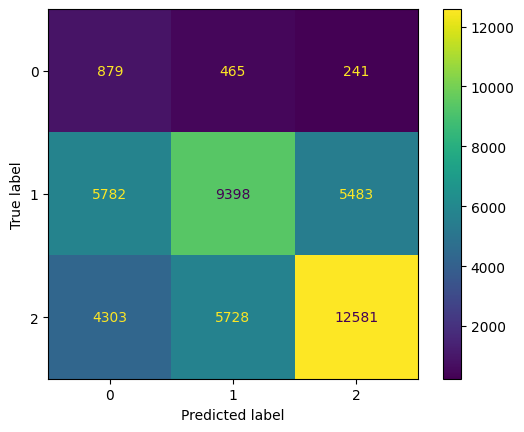

In [31]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric']
)

Accuracy: 0.5095407935800268
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.55      0.14      1585
           1       0.60      0.45      0.52     20663
           2       0.69      0.56      0.61     22612

    accuracy                           0.51     44860
   macro avg       0.46      0.52      0.42     44860
weighted avg       0.63      0.51      0.55     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.5095407935800268,
 '              precision    recall  f1-score   support\n\n           0       0.08      0.55      0.14      1585\n           1       0.60      0.45      0.52     20663\n           2       0.69      0.56      0.61     22612\n\n    accuracy                           0.51     44860\n   macro avg       0.46      0.52      0.42     44860\nweighted avg       0.63      0.51      0.55     44860\n')

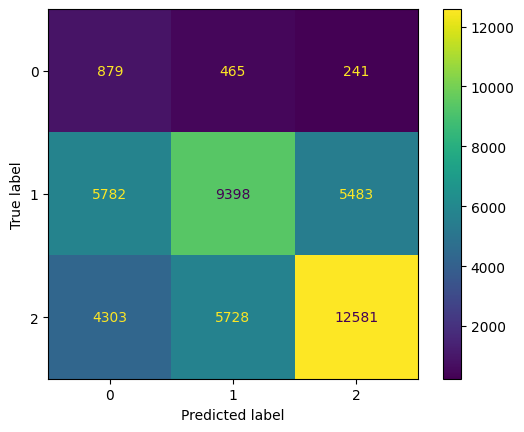

In [32]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric'],
    class_weight='balanced',
)

# DBSCAN+k-Means

In [33]:
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
import pandas as pd

# Step 1: Apply DBSCAN to eliminate noise points
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan_labels = dbscan.fit_predict(train_set[feats])

# Filter out noise points (label -1 indicates noise in DBSCAN)
X_dbscan_filtered = train_set[dbscan_labels != -1][feats]
y_dbscan_filtered = train_set[dbscan_labels != -1]['ratingQualityNumeric']

# Step 2: Apply k-Means to oversample by keeping medoids on larger classes
undersampled_data = []
undersampled_labels = []

# Get the min class size
min_class_size = y_dbscan_filtered.value_counts().min()

for label in np.unique(y_dbscan_filtered):
    # Extract data for the current class
    class_data = X_dbscan_filtered[y_dbscan_filtered == label]
    
    # Apply k-Means clustering
    kmeans = KMeans(n_clusters=min_class_size, random_state=42)
    kmeans.fit(class_data)
    
    # Keep medoids (cluster centers)
    undersampled_data.append(kmeans.cluster_centers_)
    undersampled_labels.extend([label] * min_class_size)

# Combine oversampled data and labels
X_undersampled = pd.DataFrame(np.vstack(undersampled_data), columns=feats)
y_undersampled = pd.Series(undersampled_labels)

# Display the oversampled data
print("Undersampled X shape:", X_undersampled.shape)
print("Undersampled y shape:", y_undersampled.shape)

class_counts = y_undersampled.value_counts()
print("Class counts after resampling:", class_counts)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3490) found smaller than n_clusters (3497). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Undersampled X shape: (10491, 29)
Undersampled y shape: (10491,)
Class counts after resampling: 0    3497
1    3497
2    3497
Name: count, dtype: int64


Accuracy: 0.5095407935800268
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.55      0.14      1585
           1       0.60      0.45      0.52     20663
           2       0.69      0.56      0.61     22612

    accuracy                           0.51     44860
   macro avg       0.46      0.52      0.42     44860
weighted avg       0.63      0.51      0.55     44860



(DecisionTreeClassifier(random_state=42),
 0.5095407935800268,
 '              precision    recall  f1-score   support\n\n           0       0.08      0.55      0.14      1585\n           1       0.60      0.45      0.52     20663\n           2       0.69      0.56      0.61     22612\n\n    accuracy                           0.51     44860\n   macro avg       0.46      0.52      0.42     44860\nweighted avg       0.63      0.51      0.55     44860\n')

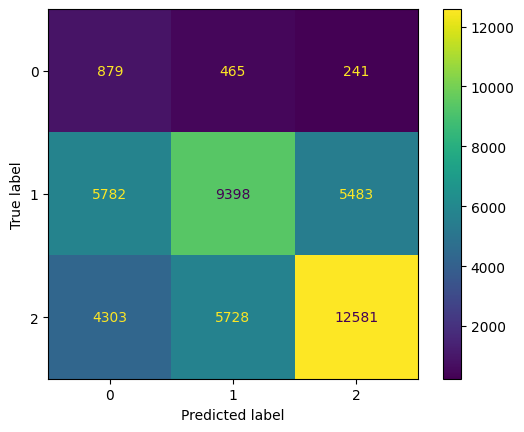

In [34]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric']
)

Accuracy: 0.5095407935800268
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.55      0.14      1585
           1       0.60      0.45      0.52     20663
           2       0.69      0.56      0.61     22612

    accuracy                           0.51     44860
   macro avg       0.46      0.52      0.42     44860
weighted avg       0.63      0.51      0.55     44860



(DecisionTreeClassifier(class_weight='balanced', random_state=42),
 0.5095407935800268,
 '              precision    recall  f1-score   support\n\n           0       0.08      0.55      0.14      1585\n           1       0.60      0.45      0.52     20663\n           2       0.69      0.56      0.61     22612\n\n    accuracy                           0.51     44860\n   macro avg       0.46      0.52      0.42     44860\nweighted avg       0.63      0.51      0.55     44860\n')

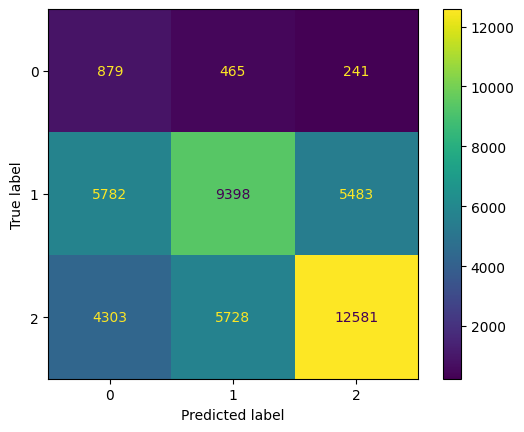

In [35]:
train_decision_tree(
    X_resampled, y_resampled,
    test_set[feats], test_set['ratingQualityNumeric'],
    class_weight='balanced',
)